# Assignment 2a Due 9/8

In this assigment you will explore and become familiar with writing and using algorithms to numerically approxomate definite integrals.

Assignment Overview:
* Impliment your own midpoint, trapazoid, and Simpson's rule integration algorithms
* Use those to solve a definite integral
* Compare your algorithms to those from scipy
* Compare all approximate solutions to the exact solutions


You can import only the following packages: numpy, math, scipy, matplotlib.pyplot

In [83]:
#your import cell
import numpy as np
import math 
import scipy as sp
import matplotlib.pyplot as plt
import scipy.integrate

Now we can define our integration algorithms

In [98]:
#define midpoint rule

def riemann_sum_mid(f,xmin,xmax,n_part):
    '''Approximates integral using Riemann sum of the midpoint.
       Takes the function f(x),
                  intitial x position, xmin,
                   final x position, xmax,
                   and number of partitions, n_part
                   as agruments'''
    #define Delta x
    
    dx = (xmax - xmin)/float(n_part)
    area = 0

    
    
    for i in range (0,n_part):
        j = i + .5
        area += dx*f(xmin + j*dx)
   
    
    return area


my_func = lambda x : x**2
riemann_sum_mid(my_func,0,5,10) 

41.5625

In [2]:
#define trapazoidal rule

def trap_sum(f,xmin,xmax,n_part):
    '''Approximates integral using Trapezoidal sum.
       Takes the function f(x),
                  intitial x position, xmin,
                   final x position, xmax,
                   and number of partitions, n_part
                   as agruments'''
    #define Delta x
    
    dx = (xmax - xmin)/float(n_part)
    area = 0

    
    
    for i in range (0,n_part):
        j = i+1
        area += dx*(f(xmin + j*dx)+f(xmin + i*dx))/2
   
    
    return area

my_func = lambda x : x**2
trap_sum(my_func,0,5,10) 


41.875

In [69]:
#define simpson's rule 
# simpson's is weighted average of trapezoid and midpoint

def simpson(f, xmin, xmax, n_part):
    '''Approximates integral using simpson's rule.
    Takes the function f(x),intitial x position, xmin,final x position, xmax, and number of partitions, n_partas agruments'''
        
    area1 = (1/3) * trap_sum(f,xmin,xmax,n_part) + (2/3) * riemann_sum_mid(f,xmin,xmax,n_part)
    return  area1



# Question 
Sanity checking your code is very important. How can you check that your functions are working properly?

Test them by putting numbers in. One way is by generating random numbers with a seed so put into the function. 

For this notebook assigment we would like to solve the integral\
$\int_{a}^{b} \frac{2}{(2^2 + x^2)^{3/2}}dx$

# Question
Have you seen an integral like this before in physics? From where?

I believe I saw an integral kind of like this before in Physics 1062. Something to do with Electricity and Magnetism.

Solve the above integral using the numerical integrations that you wrote. When defining the function we will integrate over do so using python's **lambda** function.

For the integration take $a = 0,\; b = 2,\;$ and we will split it up into 6 partitions.

# Question
What is the exact solution?

In [75]:
#exact solution to the integral
int_exact = 0.7482134192197608

In [73]:
#solve the integral using your integration functions
int_func = lambda x : 2/(((2**2)+(x**2)**(3/2)))
trap = trap_sum(int_func,0,2,6) 
simp = simpson(int_func,0,2,6) 
mid = riemann_sum_mid(int_func,0,2,6) 
#left = riemann_sum_left(int_func,0,2,6) 
#right = riemann_sum_right(int_func,0,2,6) 
print(trap)
print(simp)
print(mid)

0.7466588545912648
0.7482162531145313
0.7489949523761645


Use the trapz and simps methods from scipy's integration library to solve the integral.

Note: Shit+tab at the end of a function in jupyter notebook reveals lots of information about the function.

In [74]:
#scipy integration

xs = np.linspace(0,2,6)
int_func2 = 2/(((2**2)+(xs**2)**(3/2)))
print(sp.integrate.trapz(int_func2,xs))
print(sp.integrate.simps(int_func2,xs))

0.7459677252914133
0.7483842216483411


# Question
How do scipy integrals compare to yours? Support your answer. 

Mine

0.7466588545912648
0.7482162531145313

Scipy 

0.7459677252914133
0.7483842216483411

They are similar to the first 3 decimals 

In [ ]:
#print the numerical values


Numerically compare your midpoint, trapazoid, and Simpson method results to the exact value by calculating the quantity (approx - exact) / exact for each method. 

In [79]:
#numerical comparisons
def error(approx, exact=int_exact):
    err = abs((approx - exact)/exact)
    return err

print(error(trap))
print(error(simp))
print(error(mid))

0.0020777021482949586
3.7875487096589575e-06
0.0010445323972118935


# Question
Which method provides the best approximation to the exact solution?

Simpson

It is often useful to represent the data graphically. Make a scatter plot showing the percent difference $100 \times \frac{approx. - exact}{exact}$ vs. integration method. Integration method on your x-axis should be strings such as *midpoint, trapazoid, and Simpson*. You should also draw on your plot a line at *y = 0*, which will help guide the eye where the perfect approximation (the exact solution) would sit. 

Text(0.5, 1.0, 'Scatter')

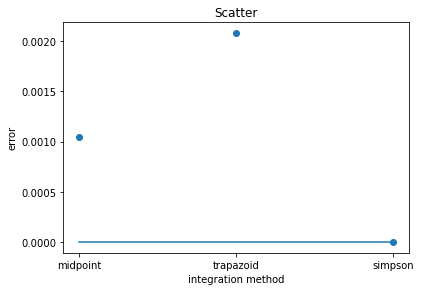

In [92]:
#plot
x1 = ["midpoint","trapazoid","simpson"]
y1 = [error(mid),error(trap),error(simp)]
y2 = [0,0,0] 

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.scatter(x1,y1,marker='o')
ax.plot(x,y2)
ax.set_xlabel('integration method')
ax.set_ylabel('error')
ax.set_title('Scatter')

Using the scipy *quad* integration method, approximate the following integral

$$\int_{-\infty}^{\infty} e^{-x^{2}} dx$$

Hint: Reference <a href="https://numpy.org/">numpy</a> and see what it has to offer in terms of functions and *special* values

In [97]:
#solve integral above

f2 = lambda x: np.exp(-x**2)

scipy.integrate.quad(f2,-np.inf,np.inf)

(1.7724538509055159, 1.4202636780944923e-08)

# Question
If you square your solution, does the resulting number have any special meaning?

It is pi